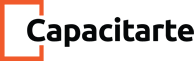

### **Colab Python para Módulo 4**

En este modulo vamos a realizar nuestro primer modelo supervisado para un análisis predictivo de clasificación.

Utilizaremos el dataset de Titanic, uno de los set de datos mas utilizados para los desafios de Data Science.

En nuestro caso, utilizaremos lo aprendido para intentar predecir si un pasajero de este famoso barco Sobrevive o No Sobrevive de acuerdo a diversas variables, tales como la ubicación, la tarifa pagada, entre otras.

In [ ]:
## Librerias que vamos a utilizar
import pandas as pd # Link:  https://pandas.pydata.org/
import numpy as np # Link : https://numpy.org/
import sklearn as skl # Link : https://scikit-learn.org/stable/
import seaborn as sns # Link : https://seaborn.pydata.org/
import matplotlib.pyplot as plt # Link: https://matplotlib.org/

# 1. Entendemos el negocio

Fuente: https://www.kaggle.com/competitions/titanic/data

Titanic Dataset es un problema muy famoso donde usamos usamos Machine Learning para predecir que pasajero sobrevive o no sobrevive al titanic, a partir de variables previamente disponibles, como por ejemplo, la tarifa que pagó, su ubicación en la embarcación, la clase de servicio pagado, entre otros.

Es un dataset muy didáctico y es el mas famoso para aprender a realizar algoritmos de clasificación predictivos.

A continuación les dejamos información de las distintas variables:

* PassengerId: ID único de cada pasajero
* Pclass: Clase del billete del pasajero (1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase)
* Name: Nombre del pasajero
* Sex: Género del pasajero (Masculino o Femenino)
* Age: Edad del pasajero en años
* SibSp: Cantidad de hermanos/cónyuges a bordo del Titanic
* Parch: Cantidad de padres/hijos a bordo del Titanic
* Ticket: Número de billete del pasajero
* Fare: Tarifa pagada por el pasajero por el billete
* Cabin: Número de cabina del pasajero
* Embarked: Puerto de embarque del pasajero (C = Cherbourg, Q = Queenstown, S = Southampton)

Target/Objetivo:

*  **Survived: Indica si el pasajero sobrevivió o no (0 = No, 1 = Sí)**

Es importante tener en cuenta que no todas estas variables se utilizarán en todos los modelos de Machine Learning para predecir la supervivencia de un pasajero. En algunos casos, ciertas variables pueden ser irrelevantes o redundantes, o pueden requerir más procesamiento para ser útiles en la construcción de un modelo.







# 2. Entendemos los datos

In [ ]:
df = pd.read_csv('/content/titanic.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

<Axes: >

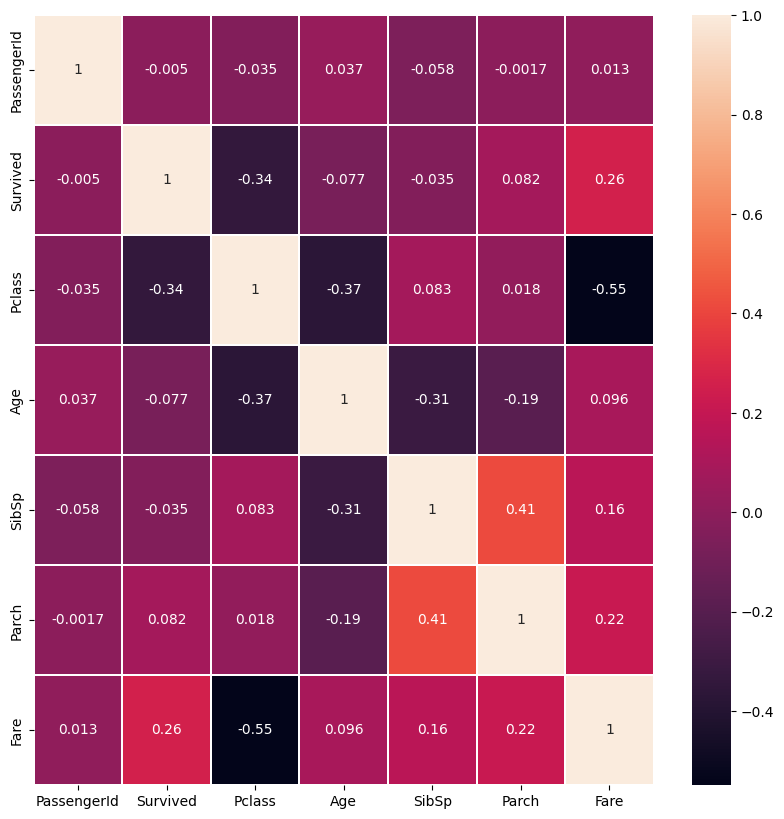

In [ ]:
df_correlacion = df.corr()
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(data = df_correlacion, annot = True, linewidths = 0.3, ax = ax)

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

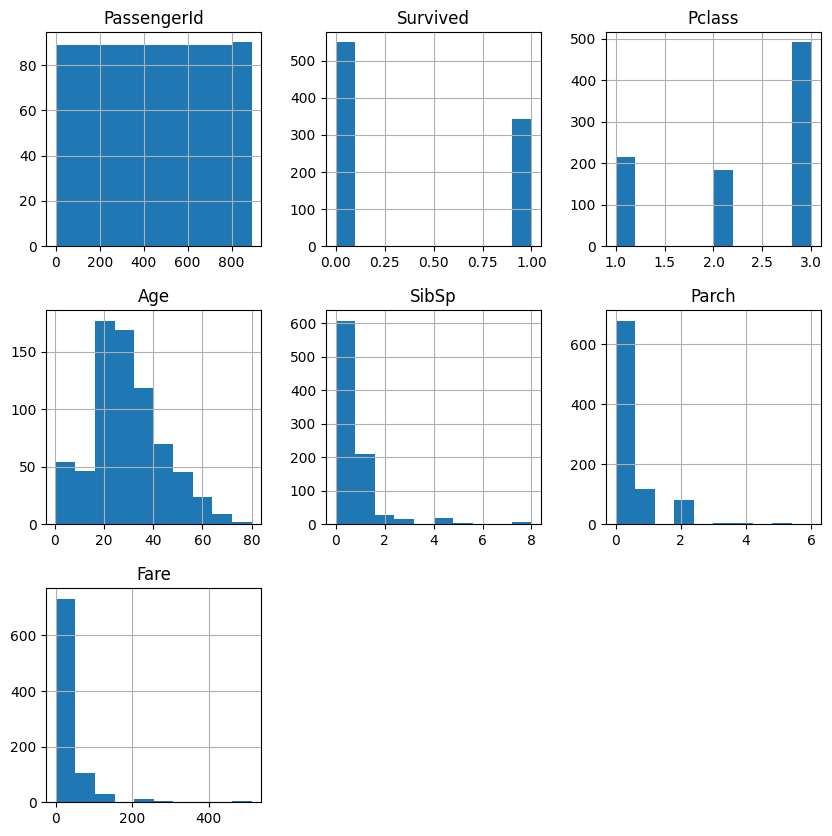

In [ ]:
# To Do: Realizamos un análisis de distribución de variables
df.hist(bins = 10, figsize = (10,10))

# 3. Preprocesamiento de los datos

### 3.1 Limpieza de nulls y errores

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
# To Do: Contar nulls ('na') y ejecutar un fill -999 en 'Age'. Reemplazar los nulls de 'Embarked' con la letra 'Z'

In [ ]:
df.shape

(891, 12)

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
df['Age'].fillna(-999, inplace = True)

In [ ]:
df['Embarked'].fillna('Z', inplace = True)

### 3.2 Variables Categóricas

In [ ]:
# To Do: Evaluar cuantas variables categóricas hay. S
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# To Do: Convertir Sexo y Embarked a número mediante labelEncoder
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

In [ ]:
df['Sex_enc'] = le_sex.fit_transform(df['Sex'])
df['Embarked_enc'] = le_embarked.fit_transform(df['Embarked'])

In [ ]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Sex_enc  Embarked_enc  
0      0         A/5 21171   7.2500   NaN        S        1             2  
1      0          PC 17599  71.2833   C85        C        0             0  
2      0  STON/O2. 3101282   7.9250   NaN        S        0             2  
3      0            113803  53.1000  C123        S        0             2  
4      0            373450   8.0500   NaN        S        1             2

In [ ]:
# To Do: Eliminar columnas Cabin | Ticket | Name | PassengerId | Sex | Embarked
lista_borrado = ['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
df.drop(lista_borrado, inplace = True, axis = 1)
df.head()

Survived  Pclass   Age  SibSp  Parch     Fare  Sex_enc  Embarked_enc
0         0       3  22.0      1      0   7.2500        1             2
1         1       1  38.0      1      0  71.2833        0             0
2         1       3  26.0      0      0   7.9250        0             2
3         1       1  35.0      1      0  53.1000        0             2
4         0       3  35.0      0      0   8.0500        1             2

# 4. Entrenamiento

### 4.1 Separacion en Train y Test

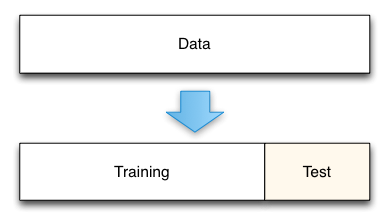

In [ ]:
# Data es DF. Training será el 75% y Test el 25%

In [ ]:
df.head()

Survived  Pclass   Age  SibSp  Parch     Fare  Sex_enc  Embarked_enc
0         0       3  22.0      1      0   7.2500        1             2
1         1       1  38.0      1      0  71.2833        0             0
2         1       3  26.0      0      0   7.9250        0             2
3         1       1  35.0      1      0  53.1000        0             2
4         0       3  35.0      0      0   8.0500        1             2

In [ ]:
X = df.drop('Survived', axis = 1)
X.head(5)

Pclass   Age  SibSp  Parch     Fare  Sex_enc  Embarked_enc
0       3  22.0      1      0   7.2500        1             2
1       1  38.0      1      0  71.2833        0             0
2       3  26.0      0      0   7.9250        0             2
3       1  35.0      1      0  53.1000        0             2
4       3  35.0      0      0   8.0500        1             2

In [ ]:
y = df.Survived

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 11)
print("Shape de X_train: ", X_train.shape)
print("Shape de X_test: ", X_test.shape)
print("Shape de y_train: ", y_train.shape)
print("Shape de y_test: ", y_test.shape)

Shape de X_train:  (668, 7)
Shape de X_test:  (223, 7)
Shape de y_train:  (668,)
Shape de y_test:  (223,)


### 4.2 Eleccion del algoritmo

Para los problemas de clasificación hay múltiples algoritmos. El más famoso es el Árbol de Decision, que consiste en un estimador que a partir de reglas lógicas y despliegue probabilístico va definiendo cual es la etiqueta óptima para cada instancia. 

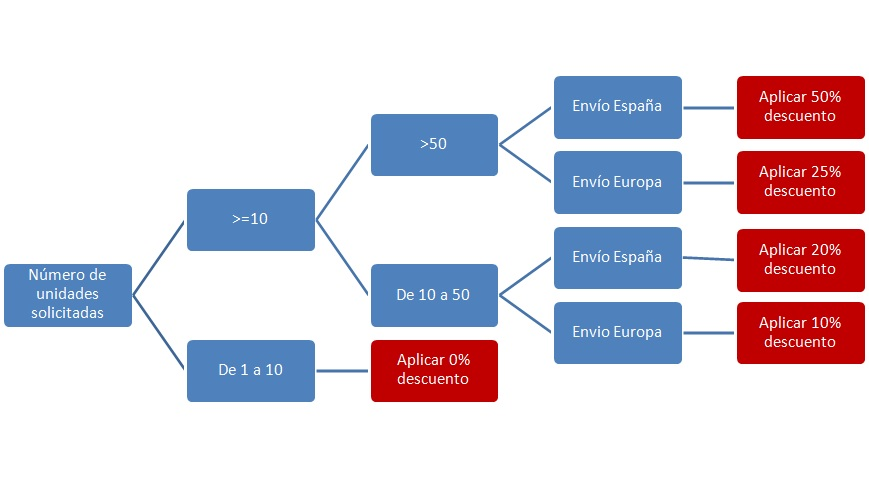

In [ ]:
# To Do: Crear un algoritmo de árbol de Decision sin parámetros

In [ ]:
from sklearn import tree
arbol = tree.DecisionTreeClassifier(max_depth = 10)

In [ ]:
# To Do: Entrenar nuestro árbol de decisión con el set de datos de entrenamiento

In [ ]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
# To Do: Realizar una predicción sobre X_test y luego armar una columna con los resultados

In [ ]:
X_test.drop(['y_pred', 'y_real'], inplace = True, axis = 1)

In [ ]:
X_test['y_pred'] = arbol.predict(X_test)

In [ ]:
X_test['y_real'] = y_test
X_test.head()

Pclass    Age  SibSp  Parch     Fare  Sex_enc  Embarked_enc  y_pred  \
431       3 -999.0      1      0  16.1000        0             2       1   
821       3   27.0      0      0   8.6625        1             2       0   
629       3 -999.0      0      0   7.7333        1             1       0   
626       2   57.0      0      0  12.3500        1             1       1   
665       2   32.0      2      0  73.5000        1             2       0   

     y_real  
431       1  
821       1  
629       0  
626       0  
665       0

In [ ]:
output = X_test[['y_pred', 'y_real']]

### 4.3 Interpretación y evaluación de resultados

In [ ]:
output.head()

y_pred  y_real
431       1       1
821       0       1
629       0       0
626       1       0
665       0       0

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import graphviz

In [ ]:
data = tree.export_graphviz(arbol, out_file=None, feature_names = X_train.columns, 
                                filled=True, class_names=['No Sobrevive', "Sobrevive"])

# Draw graph
graph = graphviz.Source(data, format="png") 
graph

Existen distintos tipos de métricas, segun el dataset, el problema y la tolerancia al error que tengamos. 

Dos de las más utilizadas son el Accuracy y  la matriz de confusion
- El **accuracy** (exactitud) es una medida de desempeño comúnmente utilizada para evaluar la precisión de un modelo de clasificación. Se define como la proporción de predicciones correctas realizadas por el modelo sobre el total de predicciones realizadas

- La **matriz de confusión** es una tabla que tiene cuatro entradas: verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN). Los verdaderos positivos son los casos donde el modelo predice correctamente la clase positiva, los verdaderos negativos son los casos donde el modelo predice correctamente la clase negativa, los falsos positivos son los casos donde el modelo predice incorrectamente la clase positiva y los falsos negativos son los casos donde el modelo predice incorrectamente la clase negativa.

In [ ]:
# To Do: Realizamos la medicion de accuracy
accuracy_score(output.y_real, output.y_pred)

0.7892376681614349

In [ ]:
# Matriz de Confusion

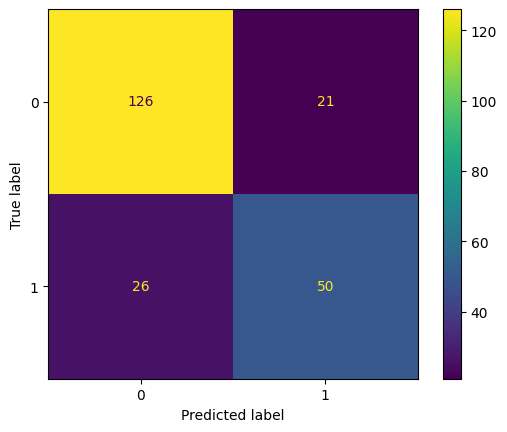

In [ ]:
cm = confusion_matrix(output.y_real, output.y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=arbol.classes_)
disp.plot()
plt.show()

# 5. Bonus: Bagging y Boosting ¿Mejoran nuestros resultados?

In [ ]:
# Recordar ejecutar previamente esto una vez
!pip install XGBoost

In [ ]:
# To Do: Construirmos un bagging (Random Forest) y un boosting (XGBoost) y medimos el accuracy ¿Mejora o no mejora?

In [ ]:
X_test.head()

Pclass    Age  SibSp  Parch     Fare  Sex_enc  Embarked_enc  y_pred  \
431       3 -999.0      1      0  16.1000        0             2       1   
821       3   27.0      0      0   8.6625        1             2       0   
629       3 -999.0      0      0   7.7333        1             1       0   
626       2   57.0      0      0  12.3500        1             1       1   
665       2   32.0      2      0  73.5000        1             2       0   

     y_real  
431       1  
821       1  
629       0  
626       0  
665       0

In [ ]:
X_test_limpio = X_test.drop(['y_pred', 'y_real'], axis = 1)

In [ ]:
# Bagging Random Forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 200)
clf.fit(X_train, y_train)
y_pred_bagging = clf.predict(X_test_limpio)

In [ ]:
# Boosting XGBoost
import xgboost as xgb

boost = xgb.XGBClassifier(n_estimators = 200)
boost.fit(X_train, y_train)
y_pred_boosting = boost.predict(X_test_limpio)

In [ ]:
print("Accuracy Bagging - Random Forest:" + str(accuracy_score(y_test, y_pred_bagging)))

print("Accuracy Boosting - XGBoost:" + str(accuracy_score(y_test, y_pred_boosting)))

Accuracy Bagging - Random Forest:0.8116591928251121
Accuracy Boosting - XGBoost:0.8251121076233184


### ¿Que podemos hacer con el modelo entrenado?

- Continuar haciendo iteraciones aumentando o reduciendo la cantidad de variables predictoras en X
- Probar otros algoritmos de bagging, boosting, entre otros
- Incorporar nuevos datos